In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [88]:
# import some data to play with
iris = datasets.load_iris()

# Choose the first two dimensions as features - just for illustration
X = iris.data[:, :2]
y = iris.target

indices = np.arange(len(X))
np.random.shuffle(indices)
train_indices = indices[:100]
test_indices = indices[100:]
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# Task 1: Implement a (1-)Nearest Neighbor Classifier

In [89]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances


class NNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, X_train, y_train):
        """
        Initialize NN-Classifier with dataset
        """
        
        self.X_train = X_train
        self.y_train = y_train
        self._check_inputs()

    def fit(self, X_train, y_train): 
        """
        Can be ignored
        """
        
        return self
    
    def predict(self, X):
        """
        Predict class label of each data point (row) in the 2d-matrix X
        """
        
        predictions = []
        
        for i in range(len(X)):
            predictions.append(self._classify(X[i]))
            
        return np.array(predictions)
    
    def _classify(self, query_point):
        """
        Predict class label of a single data point (``query_point``) based on its neighbor
        as given in ``self.X_train`` and ``self.y_train``
        """

        N = len(self.X_train)
        U = np.zeros(N)
            
        for i in range(N):
            U[i] = self._distance(query_point, self.X_train[i])
        
        closest_neighbor = np.argmin(U)
        
        return self._getClassAtIndex(self.y_train, closest_neighbor)
    
    def _check_inputs(self):
        assert self.X_train is not None, "inputs missing"
        assert self.y_train is not None, "outputs missing"
        assert len(self.X_train) == len(self.y_train), "#inputs and #output inconsistent"

    def _getClassAtIndex(self, y, index):
        return y[index]

    def _distance(self, u, v):
        return np.linalg.norm(u-v)
    
    def __sklearn_is_fitted__(self):
        return True
        

In [90]:
clf = NNClassifier(X_train, y_train)
clf.predict(X_test)

array([1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 0,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       0, 2, 0, 1, 2, 2])

# Task 2: Implement a kNN-Classifier

In [91]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances


class kNNClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, X_train, y_train, k):
        """
        Initialize kNN-Classifier with dataset and the number of neighbours ``k``
        """
        
        self.X_train = X_train
        self.y_train = y_train
        self.k = k
        self._check_inputs()

    def fit(self, X_train, y_train): 
        """
        Can be ignored
        """
        
        return self
    
    def predict(self, X):
        """
        Predict class label of each data point (row) in the 2d-matrix X
        """
        
        predictions = []
        
        for i in range(len(X)):
            predictions.append(self._classify(X[i], self.k))
            
        return np.array(predictions)
        
    
    def _classify(self, query_point, k):
        """
        Predict class label of a single data point (``query_point``) based on its ``k`` nearest neighbours
        as given in ``self.X_train`` and ``self.y_train``
        """

        N = len(self.X_train)
        dists = np.zeros(N)
        
        for i in range(N):
            dists[i] = self._distance(query_point, self.X_train[i])
        
        sorted_indices = np.argsort(dists)
        
        closest_k_indices = sorted_indices[:k]
        
        k_nearest_labels = self.y_train[closest_k_indices]
        
        labels, label_counts = np.unique(k_nearest_labels, return_counts=True)
        
        return labels[np.argmax(label_counts)]
        
    
    def _check_inputs(self):
        assert self.X_train is not None, "inputs missing"
        assert self.y_train is not None, "outputs missing"
        assert len(self.X_train) == len(self.y_train), "#inputs and #output inconsistent"

    def _getClassAtIndex(self, y, index):
        return y[index]

    def _distance(self, u, v):
        return np.linalg.norm(u-v)
    
    def __sklearn_is_fitted__(self):
        return True
        

In [137]:

clf = NNClassifier(X_train, y_train)
y_hat = clf.predict(X_test)
k = 10
#clf = kNNClassifier(X_train, y_train, k=k)
#y_hat = clf.predict(X_test)


# Plot decision boundary of classifier

Text(0.5, 1.0, '3-Class classification (k = 10)')

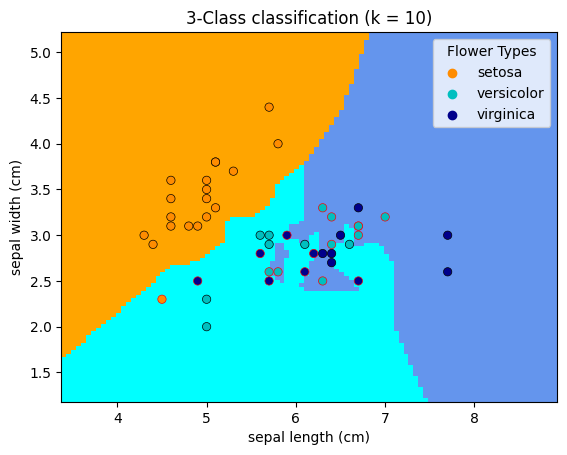

In [138]:
# See https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
# for visualization code

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

edge_colors = np.array(["red", "black"])
matches = np.array(np.array(y_hat) == np.array(y_test), dtype=int)
match_colors = edge_colors[matches]


# Plot decision boundary
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the test points
# The area's color reveals what the classifier would predict in the area
# The point's color reveals the test point's true label
scatterplot = sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=y_test,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor=match_colors
)
h, l = ax.get_legend_handles_labels()
ax.legend(h, iris.target_names, title="Flower Types")

plt.title("3-Class classification (k = %i)" % (k))